# Matplotlib

## Toy data

In [1]:
# Generate some random data
import numpy as np

x = np.random.randn(100)
y = x ** 2 + np.random.randn(100)

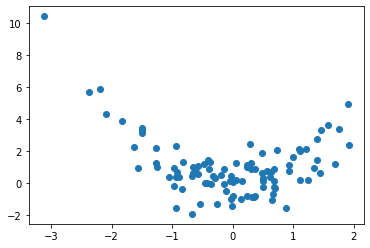

In [2]:
# Plot the data (quick and dirty way)
import matplotlib.pyplot as plt

plt.scatter(x, y)

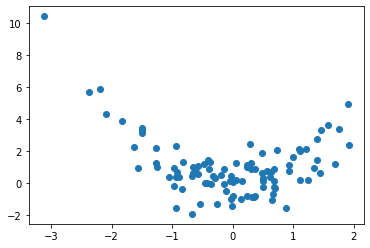

In [3]:
# Plot the data (better way)

fig, ax = plt.subplots()
ax.scatter(x, y)

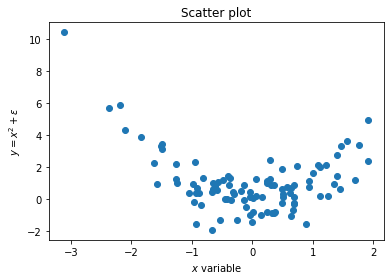

In [4]:
# Add a title and axis labels
fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_title('Scatter plot')
ax.set_xlabel('$x$ variable')
ax.set_ylabel('$y = x^2 + \\epsilon$')

fig.show()

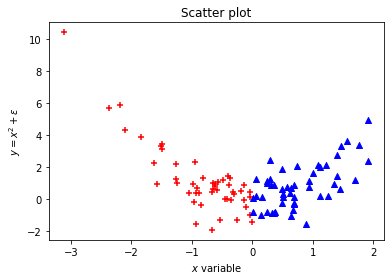

In [5]:
# Multiple plots in the same axes
fig, ax = plt.subplots()
ax.scatter(x[x < 0], y[x < 0], color="red", marker="+")
ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^")

ax.set_title('Scatter plot')
ax.set_xlabel('$x$ variable')
ax.set_ylabel('$y = x^2 + \\epsilon$')

fig.show()

In [6]:
# Regression line
import pandas as pd
import statsmodels.formula.api as smf
fitted_model = smf.ols(formula='y ~ x + I(x**2)', data=pd.DataFrame({'x': x, 'y': y})).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.18e-27
Time:                        18:35:42   Log-Likelihood:                -137.47
No. Observations:                 100   AIC:                             280.9
Df Residuals:                      97   BIC:                             288.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0432      0.120     -0.361      0.719      -0.281       0.194
x             -0.0492      0.101     -0.485      0.629      -0.251       0.152
I(x ** 2)      1.0302      0.071     14.599      0.000       0.890       1.170
==============================================================================
Omnibus:                        1.974   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                2.007
Skew:                          -0.317   Prob(JB):                        0.367
Kurtosis:                       2.719   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

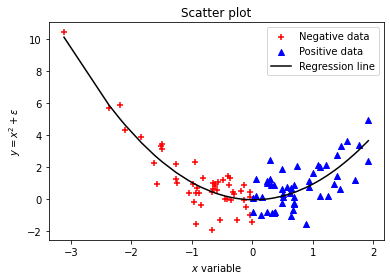

In [7]:
y_hat = fitted_model.predict()

order = np.argsort(x)

fig, ax = plt.subplots()
ax.scatter(x[x < 0], y[x < 0], color="red", marker="+")
ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^")
ax.plot(x[order], y_hat[order], color="black")

ax.set_title('Scatter plot')
ax.set_xlabel('$x$ variable')
ax.set_ylabel('$y = x^2 + \\epsilon$')

ax.legend(['Negative data', 'Positive data', 'Regression line'])

In [8]:
# Save figure
fig.set_size_inches(8, 6)
fig.savefig('out/scatter_plot.png', facecolor="white", dpi=300)

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


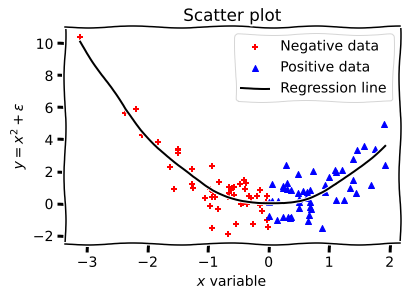

In [9]:
# xkcd style
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.scatter(x[x < 0], y[x < 0], color="red", marker="+")
    ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^")
    ax.plot(x[order], y_hat[order], color="black")

    ax.set_title('Scatter plot')
    ax.set_xlabel('$x$ variable')
    ax.set_ylabel('$y = x^2 + \\epsilon$')

    ax.legend(['Negative data', 'Positive data', 'Regression line'])

    fig.show()

## Actual data

In [10]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0, 0.5, 'Sepal width')

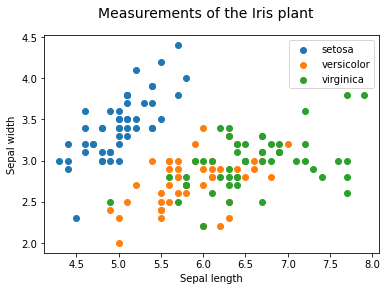

In [12]:
fig, ax = plt.subplots()
fig.suptitle('Measurements of the Iris plant', fontsize=14)
for (species, sub_df) in iris.groupby("species"):
    ax.scatter(sub_df["sepal_length"], sub_df["sepal_width"], label=species)

ax.legend()
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")

Text(0, 0.5, 'Sepal width')

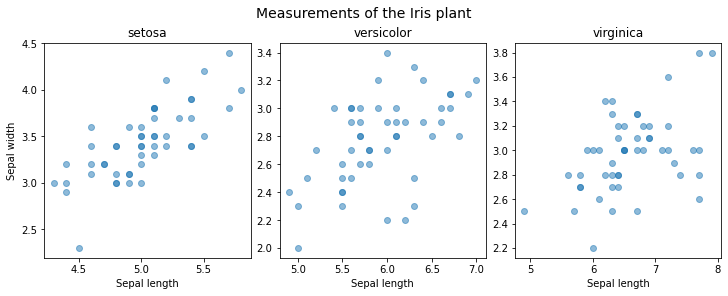

In [13]:

fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.set_size_inches(10, 4)
fig.suptitle('Measurements of the Iris plant', fontsize=14)
for i, (species, sub_df) in enumerate(iris.groupby("species")):
    ax[i].scatter(sub_df["sepal_length"], sub_df["sepal_width"], alpha=0.5)
    ax[i].set_title(species)
    ax[i].set_xlabel("Sepal length")

ax[0].set_ylabel("Sepal width")

## Directly from a dataframe

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

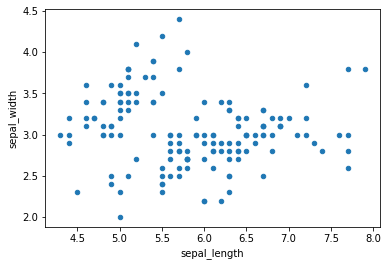

In [14]:
iris.plot.scatter(x="sepal_length", y="sepal_width")

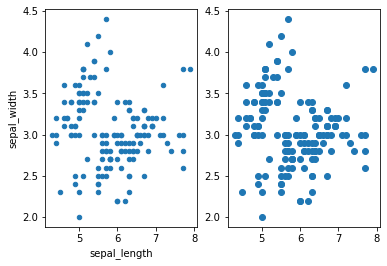

In [15]:
fig, ax = plt.subplots(1, 2)
iris.plot.scatter(x="sepal_length", y="sepal_width", ax=ax[0])
ax[1].scatter(iris["sepal_length"], iris["sepal_width"])

<AxesSubplot:ylabel='Frequency'>

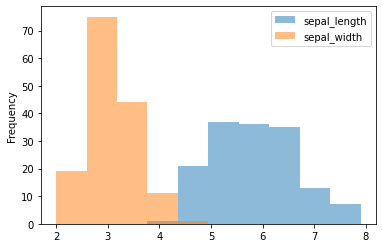

In [16]:
iris[["sepal_length", "sepal_width"]].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

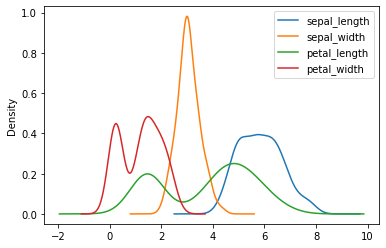

In [17]:
iris.plot.kde()